In [1]:
from pymongo import MongoClient
import pandas as pd
import time

In [2]:
client = MongoClient("localhost:27017")

In [3]:
client.list_database_names()

['Ironhack', 'admin', 'config', 'local']

In [4]:
db = client["Ironhack"]

In [5]:
c = db.get_collection("companies")

In [6]:
c

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Ironhack'), 'companies')

In [7]:
c.find_one()

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

In [8]:
c.distinct("offices")[0]

{'description': None,
 'address1': None,
 'address2': None,
 'zip_code': None,
 'city': None,
 'state_code': None,
 'country_code': 'CAN',
 'latitude': 56.130366,
 'longitude': -106.346771}

In [9]:
c.distinct("total_money_raised")

['$0',
 '$1.01M',
 '$1.02M',
 '$1.03M',
 '$1.04M',
 '$1.05M',
 '$1.06B',
 '$1.08M',
 '$1.09M',
 '$1.11M',
 '$1.13M',
 '$1.14M',
 '$1.15B',
 '$1.15M',
 '$1.16B',
 '$1.17M',
 '$1.19M',
 '$1.1B',
 '$1.1M',
 '$1.21M',
 '$1.23M',
 '$1.25M',
 '$1.27M',
 '$1.2B',
 '$1.2M',
 '$1.31M',
 '$1.32M',
 '$1.33M',
 '$1.35M',
 '$1.36M',
 '$1.3M',
 '$1.42M',
 '$1.44M',
 '$1.45M',
 '$1.46M',
 '$1.4M',
 '$1.51M',
 '$1.53M',
 '$1.55M',
 '$1.56M',
 '$1.57M',
 '$1.58M',
 '$1.5M',
 '$1.61M',
 '$1.62M',
 '$1.63M',
 '$1.65M',
 '$1.66M',
 '$1.67M',
 '$1.68M',
 '$1.69M',
 '$1.6M',
 '$1.71M',
 '$1.72M',
 '$1.73M',
 '$1.75M',
 '$1.77B',
 '$1.77M',
 '$1.7M',
 '$1.81M',
 '$1.82M',
 '$1.83M',
 '$1.84M',
 '$1.8M',
 '$1.92M',
 '$1.94M',
 '$1.95M',
 '$1.96M',
 '$1.97M',
 '$1.98M',
 '$1.99M',
 '$1.9M',
 '$10.1M',
 '$10.2M',
 '$10.3M',
 '$10.4M',
 '$10.5M',
 '$10.6M',
 '$10.7M',
 '$10.8M',
 '$10.9M',
 '$100M',
 '$100k',
 '$101M',
 '$101k',
 '$102M',
 '$103M',
 '$104M',
 '$105M',
 '$105k',
 '$106M',
 '$107M',
 '$108M',
 '$1

In [10]:
c.distinct("category_code")

[None,
 'advertising',
 'analytics',
 'automotive',
 'biotech',
 'cleantech',
 'consulting',
 'design',
 'ecommerce',
 'education',
 'enterprise',
 'fashion',
 'finance',
 'games_video',
 'government',
 'hardware',
 'health',
 'hospitality',
 'legal',
 'local',
 'manufacturing',
 'medical',
 'messaging',
 'mobile',
 'music',
 'nanotech',
 'network_hosting',
 'news',
 'nonprofit',
 'other',
 'photo_video',
 'public_relations',
 'real_estate',
 'search',
 'security',
 'semiconductor',
 'social',
 'software',
 'sports',
 'transportation',
 'travel',
 'web']

In [11]:
condition1={"total_money_raised":  {"$regex": "M$"}}
condition2={"tag_list": {"$regex": "design"}}
condition3={"category_code": "design"}

query = {"$and": [condition1,{"$or": [condition2, condition3]}]}
projection={"name":1, "_id":0, "total_money_raised":1, 
            "tag_list":1, "description":1, "offices":1, "category_code":1 }

design_companies=list(c.find(query, projection).sort('offices.country_code'))

In [12]:
df=pd.DataFrame(design_companies)
df.sample()

,name,category_code,tag_list,description,total_money_raised,offices
18,Azuro,semiconductor,"chip-design, semiconductor, eda",Digital Semiconductor Design,$10M,"[{'description': 'HQ', 'address1': '5201 Great..."


In [13]:
df.iloc[4]["offices"]

[{'description': 'Registered Office',
  'address1': '178-180 Hotwell Road',
  'address2': '',
  'zip_code': 'BS8 4RP',
  'city': 'Bristol',
  'state_code': None,
  'country_code': 'GBR',
  'latitude': None,
  'longitude': None},
 {'description': 'US Sales & Marketing',
  'address1': '2225 East Bayshore Rd',
  'address2': 'Suite 200',
  'zip_code': '94303',
  'city': 'Palo Alto',
  'state_code': 'CA',
  'country_code': 'USA',
  'latitude': None,
  'longitude': None}]

In [14]:
x=df.iloc[0]["offices"]
x[0]["longitude"]

-1.893621

In [15]:
df['city'] = df["offices"].apply(lambda x: x[0]['city'])
df['country_code'] = df["offices"].apply(lambda x: x[0]['country_code'])

In [16]:
df['state_code'] = df["offices"].apply(lambda x: x[0]['state_code'])
df['latitude'] = df["offices"].apply(lambda x: x[0]['latitude'])
df['longitude'] = df["offices"].apply(lambda x: x[0]['longitude'])

In [17]:
df['address1'] = df["offices"].apply(lambda x: x[0]['address1'])
df['address2'] = df["offices"].apply(lambda x: x[0]['address2'])
df['zip_code'] = df["offices"].apply(lambda x: x[0]['zip_code'])

In [18]:
df.drop("offices", axis=1, inplace=True)

In [19]:
df

,name,category_code,tag_list,description,total_money_raised,city,country_code,state_code,latitude,longitude,address1,address2,zip_code
0,Pumant,software,"software-development, programmers, designers, ...",None,$1.2M,Birmingham,GBR,None,52.482932,-1.893621,"Birmingham, UK",,
1,99designs,design,"graphic-design, crowdsourcing, online-marketpl...",Online graphic design marketplace,$35M,San Francisco,USA,CA,37.795531,-122.400598,447 Battery St.,3rd Floor,94111
2,Sitemasher,enterprise,"website-design-and-management-platform, saas",,C$5M,Vancouver,CAN,None,NaN,NaN,Suite 200,326 West 5th Avenue,V5Y1J5
3,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,Kaiserslautern,DEU,None,49.455996,7.806852,Europaallee 10,,67657
4,Gnodal,network_hosting,"design, infrastructure, systems",High Performance Datacenter,$2.19M,Bristol,GBR,None,NaN,NaN,178-180 Hotwell Road,,BS8 4RP
5,Moonfruit,design,,,$2.25M,London,GBR,None,NaN,NaN,,,
6,EasyLink,network_hosting,"easylink, india, web-design, web-application-d...",None,$5.4M,Chennai,IND,None,NaN,NaN,"C-Block, 1st floor, Bharathiar Complex","100 feet road, Vadapalani",600028
7,Wix,web,"website, widget, design, flash, internet",Drag-and-Drop Web Publishing Platform,$58.5M,Tel Aviv,ISR,None,NaN,NaN,,,
8,DoNanza,web,"freelance, search, freelance-jobs, freelance-t...",Freelance jobs search and tools,$1M,Tel Aviv,ISR,None,NaN,NaN,Gruzenberg Str.,,67448
9,Access Point,advertising,"web-design, web-development, logo-design, bran...",,$4.5M,Iasi,ROM,None,NaN,NaN,Socola 134a,,700187


In [20]:
df['state_code'].value_counts()

state_code
CA    10
NY     4
FL     2
IL     2
WA     1
DC     1
Name: count, dtype: int64

In [21]:
df['city'].value_counts()

city
San Francisco     3
Tel Aviv          2
New York          2
Birmingham        1
Santa Clara       1
Warrenville       1
Washington        1
Palo Alto         1
Brooklyn          1
Lisle             1
Seattle           1
Mountain View     1
St Petersburg     1
Milpitas          1
Los Angeles       1
Hollywood         1
NY                1
Los Altos         1
Iasi              1
Chennai           1
London            1
Bristol           1
Kaiserslautern    1
Vancouver         1
Orlando           1
Name: count, dtype: int64

In [22]:
df.to_csv("../dataframes/design_companies.csv", index=False)

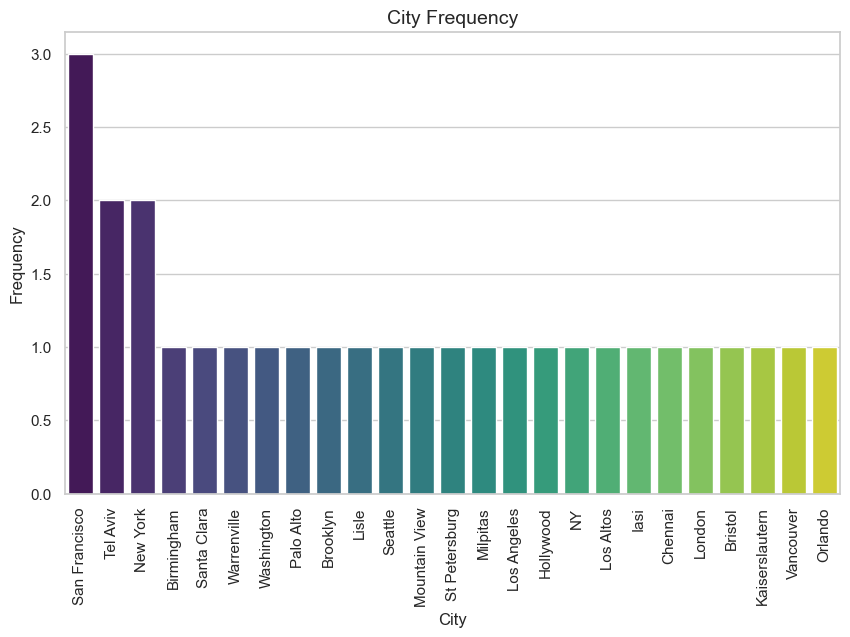

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Get the city counts
city_counts = df['city'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)

# Set the labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('City Frequency', fontsize=14)

# Show and save the graph
plt.savefig('../figures/design_cities.png')
plt.show()

SHARK ATTACKS presentation .zip
project1
project2
project3
